In [1]:
import ROOT as rt
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Upload Dataframes:
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Check.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Check.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Check.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Check.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Check.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Check.h5
Selecting events   [ 0 ,  1999927 ]  out of  1999927
number of events: 1999927


In [4]:
qr_mc1.correctAll(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_") 
qr_mc2.correctAll(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_") 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index() 

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [5]:
%time qr_mc.correctPhoIso("../phoIsoStoch/corrections_hybrid.root",n_jobs=n_jobs)

Computing corrected photon isolation using /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/../phoIsoStoch/corrections_hybrid.root


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    1.2s remaining:   17.4s
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    1.3s remaining:    8.5s
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    1.3s remaining:    5.5s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    1.4s remaining:    4.0s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:    1.5s remaining:    3.2s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:    1.6s remaining:    2.5s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:    1.7s remaining:    2.0s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:    1.7s remaining:    1.6s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:    1.8s remaining:    1.3s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:    1.9s remaining:    1.1s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:    2.0s remaining:    0.8s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 1.3 s, sys: 811 ms, total: 2.11 s
Wall time: 3.66 s


[Parallel(n_jobs=30)]: Done  31 out of  31 | elapsed:    3.1s finished


In [6]:
qr_mc.df.index.size

1997557

In [7]:
dfmc     = qr_mc.getDF()

['R9', 'S4', 'SigmaIeIe', 'EtaWidth', 'PhiWidth', 'CovarianceIphiIphi', 'CovarianceIetaIphi']
plotting  R9
plotting  S4
plotting  SigmaIeIe
plotting  EtaWidth
plotting  PhiWidth
plotting  CovarianceIphiIphi
plotting  CovarianceIetaIphi


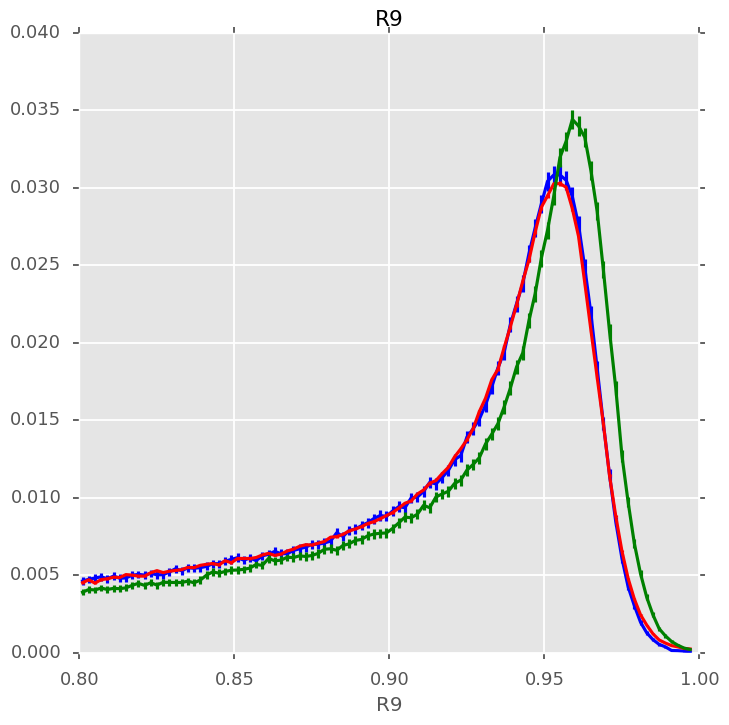

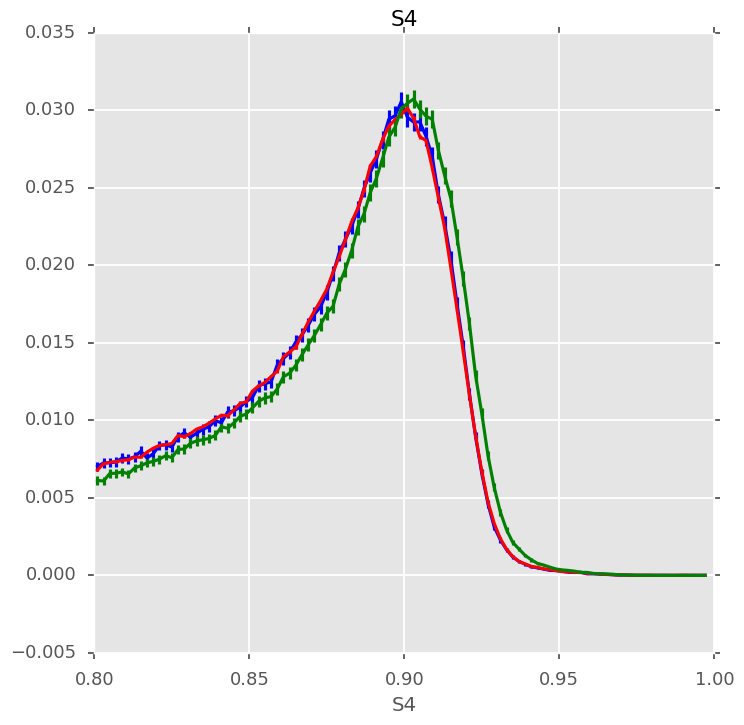

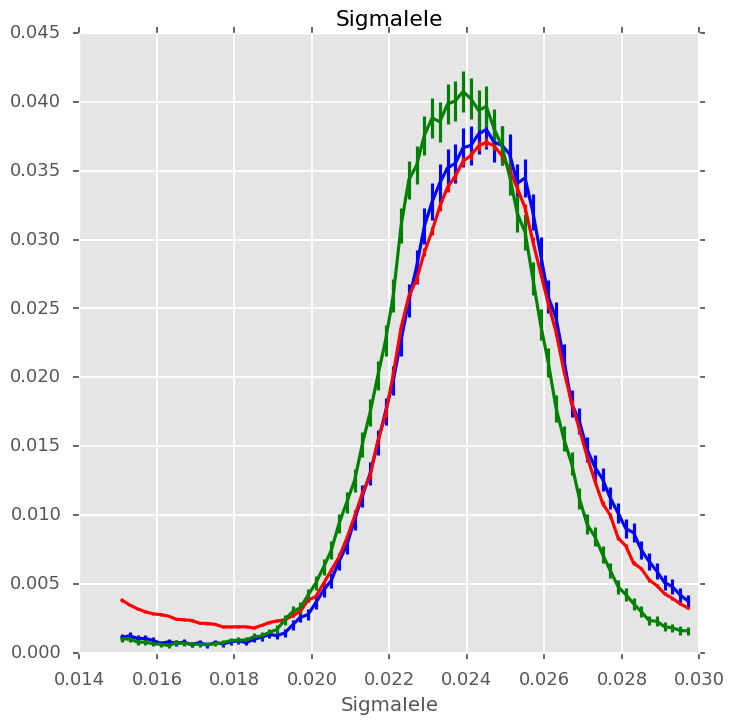

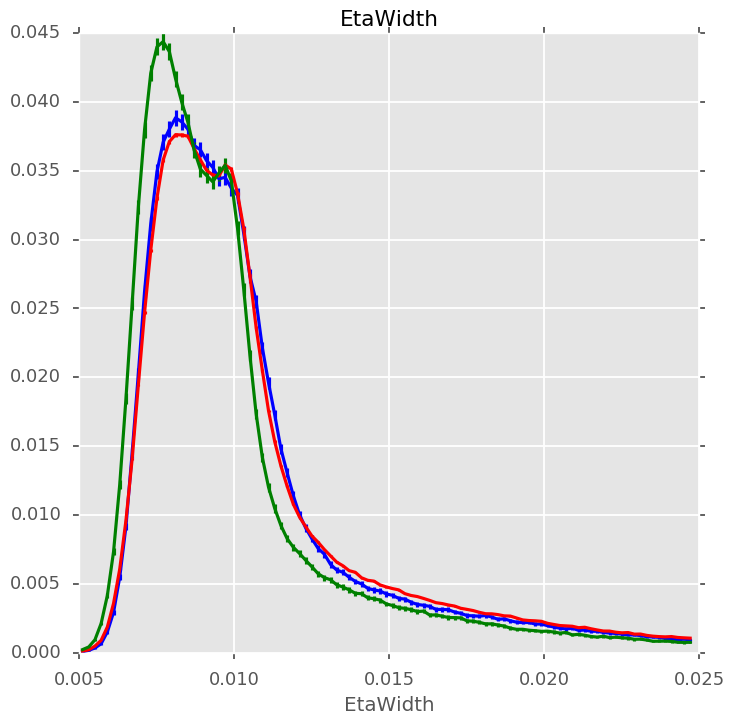

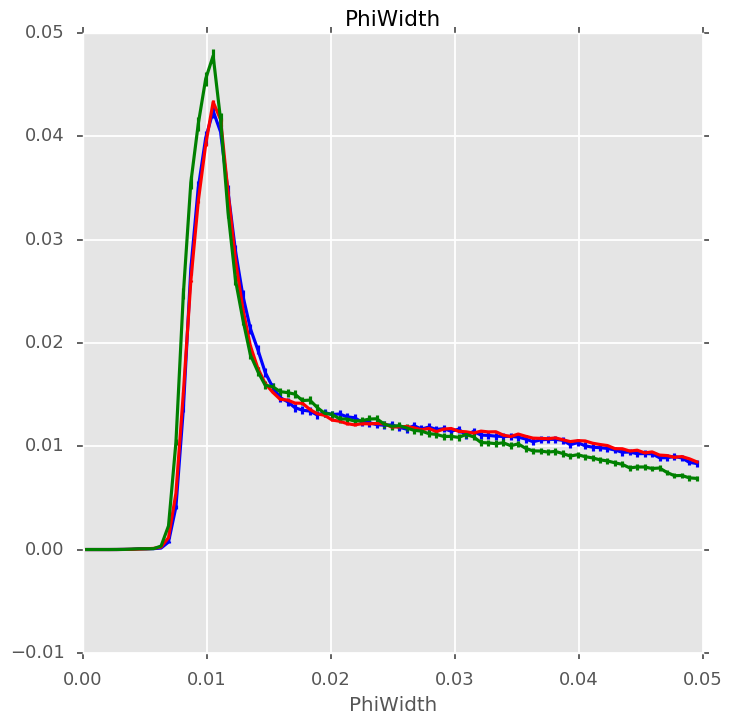

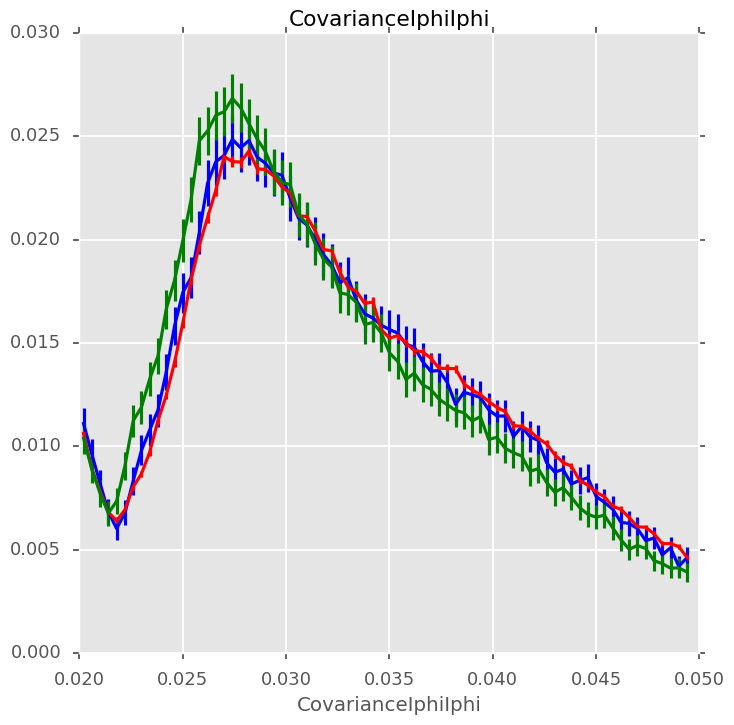

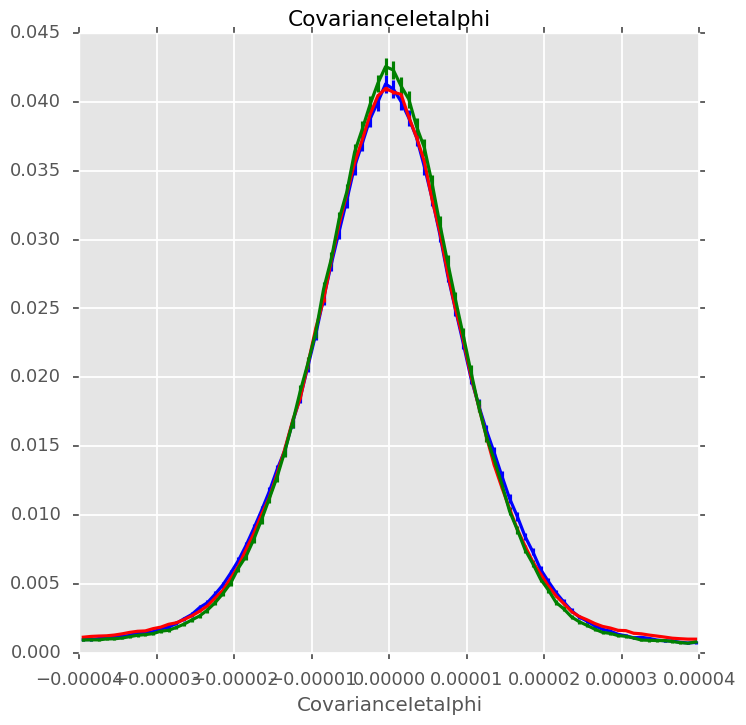

In [8]:

print ylist
for yvar in ylist:
    yvarcorr = yvar+"_corr"
    print "plotting ", yvar
    if yvar == "R9":
        rv  = np.arange(0.0,1.0,0.002)
        rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "S4":
        rv  = np.arange(0.0,1.0,0.002)
        rv2 = np.arange(0.8,1.0,0.002)
    if yvar == "SigmaIeIe":
        rv = np.arange(0.004,0.012,0.0002)
        rv2 = np.arange(0.015,0.030,0.0002)
    if yvar == "EtaWidth":
        rv = np.arange(0.0,0.05,0.0002)
        rv2 = np.arange(0.005,0.025,0.0002)
    if yvar == "PhiWidth":
        rv = np.arange(0.0,0.2,0.002)
        rv2 = np.arange(0.0,0.05,0.0006)
    if yvar == "CovarianceIphiIphi":
        rv  = np.arange(0.0, 0.02,0.0002)
        rv2 = np.arange(0.02, 0.05,0.0004)
    if yvar == "CovarianceIetaIphi":
        rv = np.arange(-0.0002, 0.0002,0.000002) 
        rv2 = np.arange(-0.00004, 0.00004,0.000001)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel(yvar)
    plot.plotHistErr(dfmc[yvar+"_corr"], rv2,Weight=dfmc["weight"], Color="b")
    plot.plotHistErr(dfdata[yvar], rv2, Color="r", Weight=dfdata["weight"])
    plot.plotHistErr(dfmc[yvar], rv2,Weight=dfmc["weight"], Color="g")  
    ax.set_title(yvar)

In [9]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4']
mvas = [ ("newPhoID",[]), ("newPhoIDcorrShowerShapes",showerShapes),  ("newPhoIDcorrIso",'PhoIso03'), 
         ("newPhoIDcorr",showerShapes+['PhoIso03']) ] 

weights = ("./phoIDMVAweights/MVAweights_80X_barrel_ICHEPvtx.xml","./phoIDMVAweights/MVAweights_80X_endcap_ICHEPvtx.xml")

In [10]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )

Computing newPhoID, correcting []


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   13.6s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   13.8s remaining:  3.3min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   13.9s remaining:  1.6min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   14.4s remaining:   59.8s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   14.9s remaining:   42.7s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   15.4s remaining:   32.4s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   15.8s remaining:   25.0s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   16.2s remaining:   19.7s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   16.4s remaining:   15.3s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   16.7s remaining:   12.0s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   16.8s remaining:    9.3s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   17.4s remaining:    7.1s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 958 ms, sys: 736 ms, total: 1.69 s
Wall time: 19.5 s
Computing newPhoID, correcting []


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    8.3s remaining:  2.0min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    9.3s remaining:  1.0min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    9.5s remaining:   39.4s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    9.8s remaining:   28.3s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   10.0s remaining:   21.0s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   10.4s remaining:   16.5s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   11.5s remaining:   14.0s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   11.6s remaining:   10.9s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   11.9s remaining:    8.6s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   13.1s remaining:    7.2s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   13.4s remaining:    5.5s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing newPhoIDcorrShowerShapes, correcting ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4']


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    8.6s remaining:  2.1min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    9.0s remaining:  1.0min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    9.5s remaining:   39.5s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    9.6s remaining:   27.7s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:    9.9s remaining:   20.8s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   10.2s remaining:   16.2s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   10.5s remaining:   12.8s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   10.9s remaining:   10.3s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   11.1s remaining:    8.0s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   12.3s remaining:    6.8s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   13.2s remaining:    5.4s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing newPhoIDcorrIso, correcting PhoIso03


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    7.6s remaining:  1.8min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    9.5s remaining:  1.1min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    9.5s remaining:   39.7s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    9.8s remaining:   28.3s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   10.1s remaining:   21.3s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   11.5s remaining:   18.1s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   11.5s remaining:   14.0s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   12.2s remaining:   11.4s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   12.8s remaining:    9.2s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   13.2s remaining:    7.3s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   13.5s remaining:    5.5s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing newPhoIDcorr, correcting ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'PhoIso03']


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    9.1s remaining:  2.2min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    9.4s remaining:  1.1min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    9.5s remaining:   39.7s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    9.7s remaining:   27.8s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:    9.8s remaining:   20.6s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:   10.1s remaining:   15.9s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:   10.3s remaining:   12.5s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:   10.4s remaining:    9.7s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:   11.0s remaining:    7.9s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:   11.4s remaining:    6.2s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:   11.8s remaining:    4.8s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 4.85 s, sys: 4.33 s, total: 9.18 s
Wall time: 1min 2s


[Parallel(n_jobs=30)]: Done  31 out of  31 | elapsed:   14.3s finished


In [11]:
dfmc['idCorr'] = dfmc['newPhoID'] - dfmc['newPhoIDcorr']
dfmc['idCorrIso'] = dfmc['newPhoID'] - dfmc['newPhoIDcorrIso']
dfmc['idCorrShowerShapes'] = dfmc['newPhoID'] - dfmc['newPhoIDcorrShowerShapes']
dfmc['absScEta'] = np.abs(dfmc['ScEta'])


In [12]:
dfmcEB   = dfmc  .query('-1.444 < ScEta and ScEta <1.444') 
dfmcEE   = dfmc  .query('ScEta < -1.57 or ScEta >1.57  ') 

In [13]:
dfEB   = dfdata  .query('-1.444 < ScEta & ScEta <1.444') 
dfEE   = dfdata  .query('ScEta < -1.57 | ScEta >1.57  ') 

Plotting.py:52: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


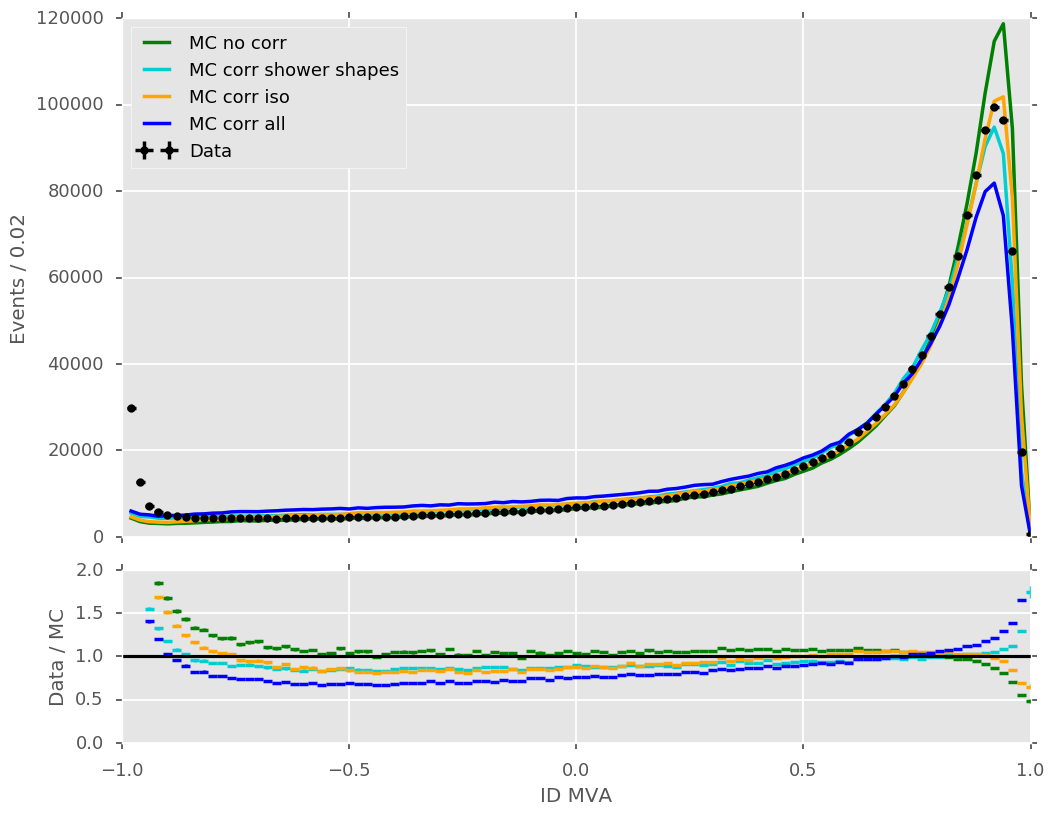

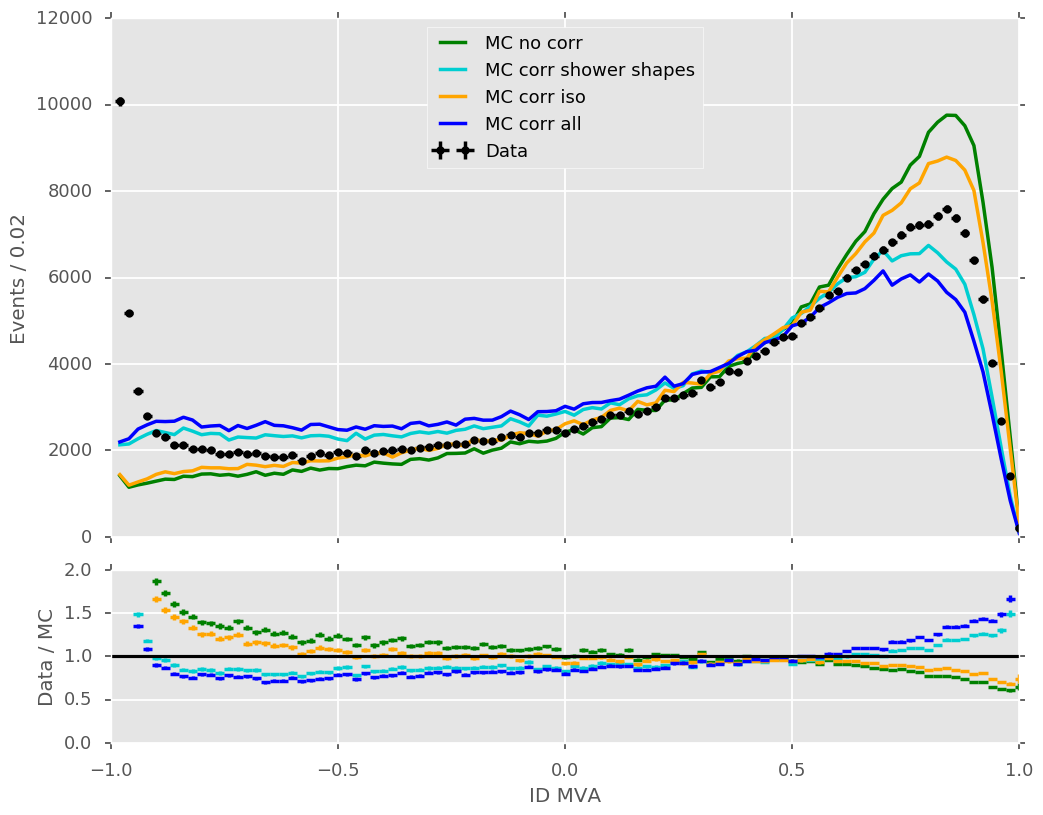

In [16]:
bins = np.linspace(-1,1,101)
var = 'newPhoID'
mclabels = [ '', 'corrShowerShapes', 'corrIso', 'corr' ]
mcstyles = [ dict(label='MC no corr',color='green'), 
             dict(label='MC corr shower shapes',color='darkturquoise'), 
             dict(label='MC corr iso',color='orange'),
             dict(label='MC corr all',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
#     with plt.xkcd()
#         draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', alpha=1, linewidth=2, ratio=True, figsize=(10,8))
